In [1]:
%matplotlib inline

import sys

sys.path.append('..')

import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import product
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = Path(os.getenv("OODIR"))
data_file = data_dir / "IQUAM" / "OutputData" / "timeseries_with_uncertainty.csv"
data = pd.read_csv(data_file, header=[0, 1], index_col=0)

(-0.5, 0.8)

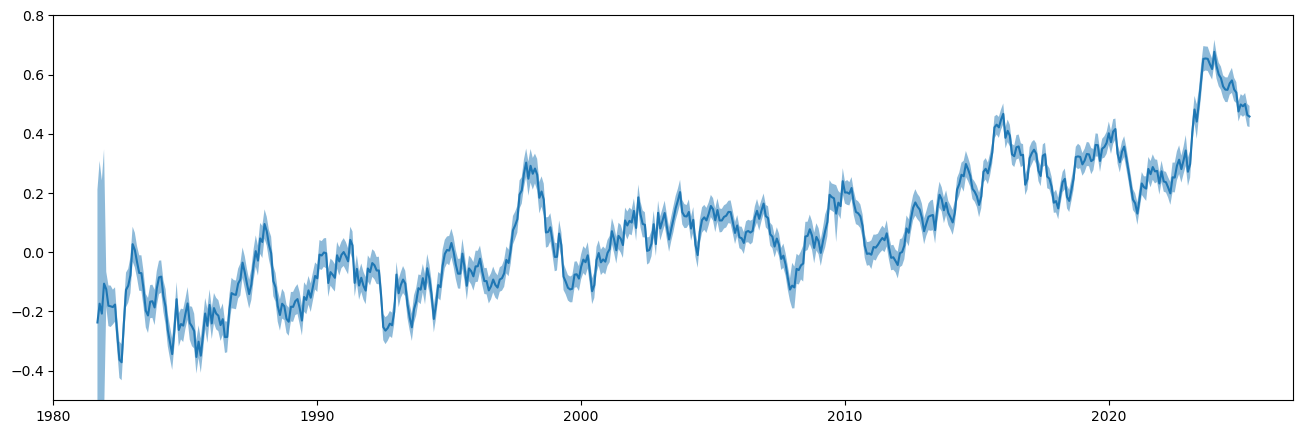

In [3]:
time = np.arange(len(data)) / 12. + 1981 + 8 / 12.

plt.figure()
plt.gcf().set_size_inches(16, 5)
plt.fill_between(time, data['all']['Global'] + 2 * data['all_unc']['Global'],
                 data['all']['Global'] - 2 * data['all_unc']['Global'], alpha=0.5)
plt.plot(time, data['all']['Global'])
plt.xlim(1980, 2027)
plt.ylim(-0.5, 0.8)

The timeseries is once again the global mean sea surface temperature anomaly from all data, but this time, it also shows the estimated uncertainty arising from measurement and grid cell sampling uncertainties.

The uncertainty shown here is rather narrow and doesn't explain the differences between series we've previously seen. That's because it doesn't include two important sources of uncertainty:

1. the broad scale sampling uncertainty associated with missing grid cells. We'll have to deal with that a different way.
2. the very large scale correlated uncertainties associated with ship data. These kinds of errors correlate across individual data sources or countries or measurement methods, so they can be effectively global or near enough.

For the time being, you'll just have to imagine that there's a much wider uncertainty range here and in the plots that follow. It's hard to put a number to that uncertainty. Other datasets and studies suggests that errors which correlate at a global level can be a few tenths of a degree, so for unadjusted ship data, the uncertainty could be considerably larger than shown here.

In [4]:
time = np.arange(len(data)) / 12. + 1981 + 8 / 12.

ship = data['ship']['Global']
ship_unc = data['ship_unc']['Global']

drifter = data['drifter']['Global']
drifter_unc = data['drifter_unc']['Global']

argo = data['argo']['Global']
argo_unc = data['argo_unc']['Global']

interp = data['interp']['Global']
interp_unc = data['interp_unc']['Global']

(-0.5, 0.86)

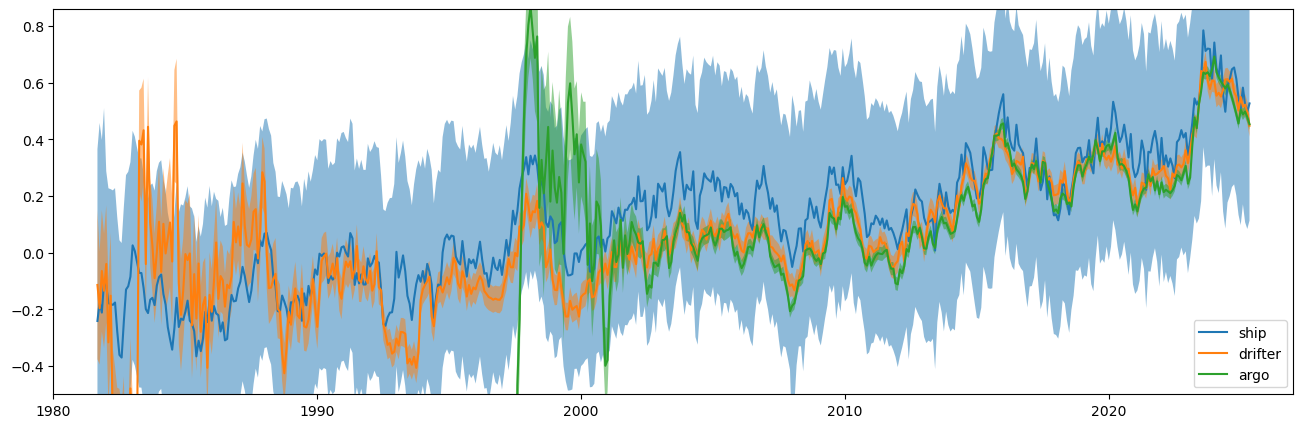

In [5]:
plt.figure()
plt.gcf().set_size_inches(16, 5)
plt.fill_between(time, ship + 2 * ship_unc, ship - 2 * ship_unc, alpha=0.5)
plt.fill_between(time, drifter + 2 * drifter_unc, drifter - 2 * drifter_unc, alpha=0.5)
plt.fill_between(time, argo + 2 * argo_unc, argo - 2 * argo_unc, alpha=0.5)

plt.plot(time, ship, label='ship')
plt.plot(time, drifter, label='drifter')
plt.plot(time, argo, label='argo')

plt.legend()
plt.xlim(1980, 2027)
plt.ylim(-0.5, 0.86)

With the same caveats as apply to the first graph, here are the global mean SST anomalies from ships, drifters and Argo data separately. You can see the larger uncertainties at the start of the drifter and argo records, which now go some way to explaining why those series are so much noisier in their early years.

Note that these series have not been colocated, so the uncertainty ranges shown here won't explain all of the difference bewteen the series. Also, as noted above, the ship-only line is probably considerably more uncertain than shown here. Imagine it being a few tenths of a degree wide. Maybe like this


(-0.5, 0.86)

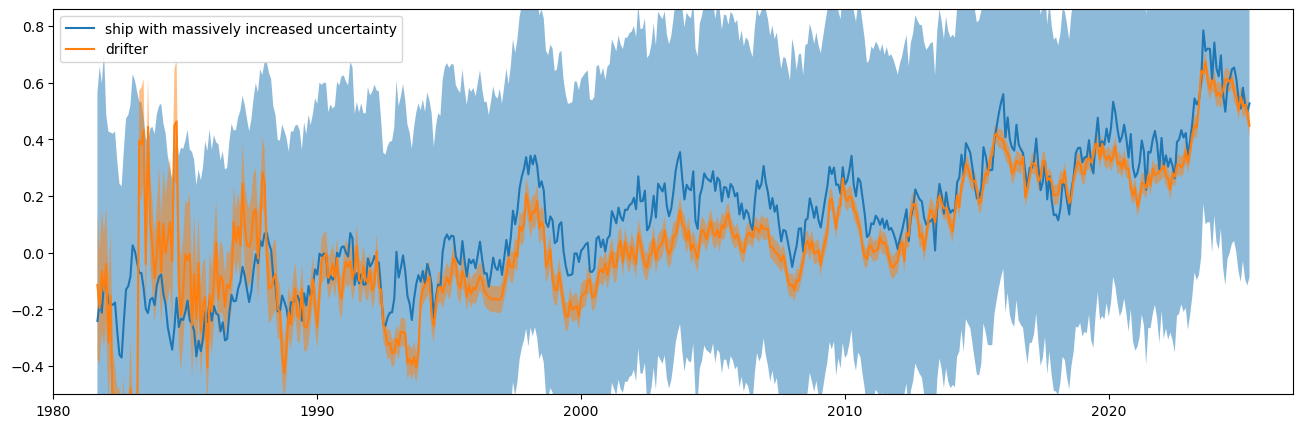

In [6]:
plt.figure()
plt.gcf().set_size_inches(16, 5)
plt.fill_between(time, ship + 2 * (ship_unc+0.1), ship - 2 * (ship_unc+0.1), alpha=0.5)
plt.fill_between(time, drifter + 2 * drifter_unc, drifter - 2 * drifter_unc, alpha=0.5)

plt.plot(time, ship, label='ship with massively increased uncertainty')
plt.plot(time, drifter, label='drifter')

plt.legend()
plt.xlim(1980, 2027)
plt.ylim(-0.5, 0.86)

You rarely see a timeseries like this because people don't usually to try and quantify this kind of uncertainty. The uncertainties are even larger further back in time. Biases associated with buckets approach 0.5C and there are large biases associated with engine room measurements.

These large, correlated errors can be estimated and removed (at least partly) from the data, and the resulting series typically have much smaller uncertainty ranges. The majority of the difficulty of making an historical SST dataset is in removing these kinds of biases and the task gets harder the further back in time we go. In the period shown here, we have drifting buoys and Argo floats against which ship data can be adjusted, but before the late 1970s we have neither of these.

Text(0.0, 1.0, 'Uncertainty in the global mean')

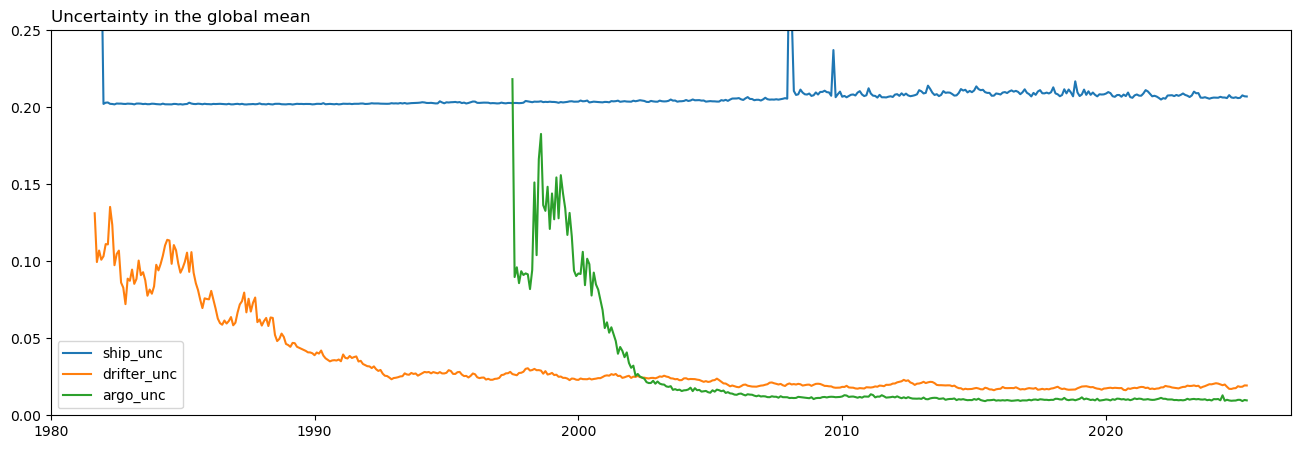

In [7]:
plt.figure()
plt.gcf().set_size_inches(16,5)
plt.plot(time, ship_unc, label='ship_unc')
plt.plot(time, drifter_unc, label='drifter_unc')
plt.plot(time, argo_unc, label='argo_unc')
plt.legend()
plt.xlim(1980, 2027)
plt.ylim(0.0, 0.25)
plt.title("Uncertainty in the global mean", loc='left')

Plotted here are the uncertainties on their own.

There's a lot of interest here. There are some odd spikes in the ship series (blue line). Why is it so high for the first few months? Why does the uncertainty increase and get noisier around 2007 (there's a change in the filename format at that point). Why are there spikes after 2007? A spike could arise for two obvious reasons:

1. it could just be that there are very few data in that month.
2. it could be that lots of ships have the same ID. This happens in some months in ICOADS where, for whatever reason, lots of ships in the database have the same ID. In modern times, lots of ships get labelled SHIP, for example. In that case, the error covariance has lots of off-diagonal elements, which lead to large scale correlated errors, which become dominant in the uncertainty in the global mean.

It's something that needs looking into in a bit more detail.

The early parts of the drifter and argo series have relatively large uncertainties in their global means despite the more reliable measurements, but the uncertainties soon drop below those from ships. Argo ends up lowest, but that's not unexpected. The Argo observations are assumed to be more accurate than those from other subsets of data.

(-0.5, 0.86)

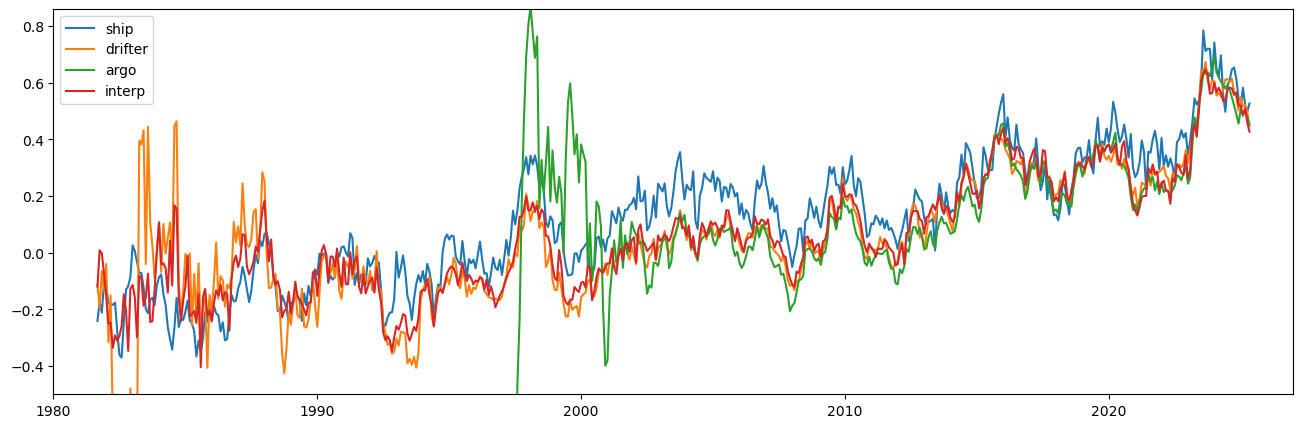

In [10]:
plt.figure()
plt.gcf().set_size_inches(16, 5)
# plt.fill_between(time, ship + 2 * ship_unc, ship - 2 * ship_unc, alpha=0.5)
# plt.fill_between(time, drifter + 2 * drifter_unc, drifter - 2 * drifter_unc, alpha=0.5)
# plt.fill_between(time, argo + 2 * argo_unc, argo - 2 * argo_unc, alpha=0.5)
# plt.fill_between(time, interp + 2 * interp_unc, interp - 2*interp_unc, alpha=0.5)

plt.plot(time, ship, label='ship')
plt.plot(time, drifter, label='drifter')
plt.plot(time, argo, label='argo')
plt.plot(time, interp, label='interp')

plt.legend()
plt.xlim(1980, 2027)
plt.ylim(-0.5, 0.86)